In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import glob
#from netCDF4 import Dataset

In [2]:
filesindir = []
for i, file in enumerate(glob.glob('./input/*')):
    filesindir.append(file)
    print(i, file)
#print(filesindir)

0 ./input\19x37.png
1 ./input\20x37.png
2 ./input\8x75.png
3 ./input\Gap_12x75f2-2_on_POLf0-s.txt
4 ./input\Gap_12x75f2_on_POLf0-s.txt
5 ./input\Gap_12x75f2_on_POLf0.txt
6 ./input\Gap_19x37f2-2_on_POLf0-s.txt
7 ./input\Gap_19x37f2_on_POLf0-s.txt
8 ./input\Gap_19x37f2_on_POLf0.txt
9 ./input\Gap_19x37f4-4_on_POLf0-s.txt
10 ./input\Gap_19x37f4_on_POLf0-s.txt
11 ./input\Gap_19x37f4_on_POLf0.txt
12 ./input\Gap_19x37fanf2-2_POLf0-s.txt
13 ./input\Gap_19x37fanf2_on_POLf0-s.txt
14 ./input\Gap_19x37fanf2_on_POLf0.txt
15 ./input\Gap_19x37fanf4-4_POLf0-s.txt
16 ./input\Gap_19x37fanf4_on_POLf0-s.txt
17 ./input\Gap_19x37fanf4_on_POLf0.txt
18 ./input\Gap_REFf2-2_on_POLf0-s.txt
19 ./input\Gap_REFf2_on_POLf0-s.txt
20 ./input\Gap_REFf2_on_POLf0.txt
21 ./input\img
22 ./input\POL_f3_on_POL_f0.txt
23 ./input\RAM12x75_f2_on_POL_f0.txt
24 ./input\RAM12x75_f3_on_POL_f0.txt
25 ./input\RAM14x75_f3_on_POL_f0.txt
26 ./input\RAM14x75_f4_on_POL_f0.txt
27 ./input\RAM16x75_f4_on_POL_f0.txt
28 ./input\RAM16x75_f5_on_

In [3]:
def readtodataframe(file, scenario):
    path = './input/'
    filename = path + file + '.txt'
    column_names = ['BasShotNo', 'MonShotNo', 'BasRecvNo', 'MonRecvNo', 'OffsDiff', 'AzimDiff', 'CMPDist', 'CMPInDist', 'CMPCrDist', 'SouDist', 'SouInDist', 'SouCrDist', 'RecDist', 'RecInDist', 'RecCrDist', 'SouRecDist']
    rowstoskip = 2
    df_raw = pd.read_csv(filename, names=column_names, skiprows=rowstoskip, delim_whitespace=True)
    df_raw['Scenario'] = scenario
    return df_raw

In [4]:
'''
df_raw_POL_f3_on_POL_f0 = readtodataframe('POL_f3_on_POL_f0', '8x75m on 8x75m')
df_raw_RAM19_f3_on_POL_f0 = readtodataframe('RAM19_f3_on_POL_f0', '19x37.5m on 8x75m')
df_raw_RAM19_f3_on_POL_f0comb = readtodataframe('RAM19_f3_on_POL_f0comb', '19x37.5m on 8x75m inc interleaved')
df_raw_RAM19_f3_on_RAM19_f0 = readtodataframe('RAM19_f3_on_RAM19_f0', '19x37.5m on 19x37.5m')
df_raw_RAM17_f3_on_POL_f0 = readtodataframe('RAM17_f3_on_POL_f0', '17x37.5m on 8x75m')
df_raw_RAM17_fanf3_on_POL_f0 = readtodataframe('RAM17_fanf3_on_POL_f0', '17x37.5m with fan on 8x75m')
'''

"\ndf_raw_POL_f3_on_POL_f0 = readtodataframe('POL_f3_on_POL_f0', '8x75m on 8x75m')\ndf_raw_RAM19_f3_on_POL_f0 = readtodataframe('RAM19_f3_on_POL_f0', '19x37.5m on 8x75m')\ndf_raw_RAM19_f3_on_POL_f0comb = readtodataframe('RAM19_f3_on_POL_f0comb', '19x37.5m on 8x75m inc interleaved')\ndf_raw_RAM19_f3_on_RAM19_f0 = readtodataframe('RAM19_f3_on_RAM19_f0', '19x37.5m on 19x37.5m')\ndf_raw_RAM17_f3_on_POL_f0 = readtodataframe('RAM17_f3_on_POL_f0', '17x37.5m on 8x75m')\ndf_raw_RAM17_fanf3_on_POL_f0 = readtodataframe('RAM17_fanf3_on_POL_f0', '17x37.5m with fan on 8x75m')\n"

In [5]:
#df_1 = readtodataframe('POL_f3_on_POL_f0', '8x75m - 3deg on 8x75m')
df_1 = readtodataframe('Gap_REFf2-2_on_POLf0-s', '10x75m - 2deg on 8x75m')
df_2 = readtodataframe('Gap_12x75f2-2_on_POLf0-s', '12x75m - 2deg on 8x75m')
#df_3 = readtodataframe('RAM12x75_f3_on_POL_f0', '12x75m - 3deg on 8x75m')
#df_4 = readtodataframe('RAM14x75_f3_on_POL_f0', '14x75m - 3deg on 8x75m')
#df_5 = readtodataframe('RAM16x75_f4_on_POL_f0', '16x75m - 4deg on 8x75m')
#df_6 = readtodataframe('RAM19_f3_on_POL_f0', '19x37.5m - 3deg on 8x75m')
df_3 = readtodataframe('Gap_19x37f2-2_on_POLf0-s', '19x37.5m - 2deg on 8x75m')
#df_5 = readtodataframe('RAM19_f3_on_POL_f0', '19x37.5m - 3deg on 8x75m')
df_4 = readtodataframe('Gap_19x37f4-4_on_POLf0-s', '19x37.5m - 4deg on 8x75m')
df_5 = readtodataframe('Gap_19x37fanf2-2_POLf0-s', '19x37.5m - 150% Fanning - 2deg on 8x75m')
df_6 = readtodataframe('Gap_19x37fanf4-4_POLf0-s', '19x37.5m - 150% Fanning - 4deg on 8x75m')

In [6]:
'''#df_1 = readtodataframe('POL_f3_on_POL_f0', '8x75m - 3deg on 8x75m')
df_1 = readtodataframe('REF_f2_on_POL_f0', '10x75.5m - 2deg on 8x75m')
df_2 = readtodataframe('Gap_12x75f2_on_POLf0', '12x75m - 2deg on 8x75m')
df_3 = readtodataframe('RAM12x75_f3_on_POL_f0', '12x75m - 3deg on 8x75m')
df_4 = readtodataframe('RAM14x75_f3_on_POL_f0', '14x75m - 3deg on 8x75m')
df_5 = readtodataframe('RAM14x75_f4_on_POL_f0', '14x75m - 4deg on 8x75m')
df_6 = readtodataframe('RAM16x75_f4_on_POL_f0', '16x75m - 4deg on 8x75m')
'''

"#df_1 = readtodataframe('POL_f3_on_POL_f0', '8x75m - 3deg on 8x75m')\ndf_1 = readtodataframe('REF_f2_on_POL_f0', '10x75.5m - 2deg on 8x75m')\ndf_2 = readtodataframe('Gap_12x75f2_on_POLf0', '12x75m - 2deg on 8x75m')\ndf_3 = readtodataframe('RAM12x75_f3_on_POL_f0', '12x75m - 3deg on 8x75m')\ndf_4 = readtodataframe('RAM14x75_f3_on_POL_f0', '14x75m - 3deg on 8x75m')\ndf_5 = readtodataframe('RAM14x75_f4_on_POL_f0', '14x75m - 4deg on 8x75m')\ndf_6 = readtodataframe('RAM16x75_f4_on_POL_f0', '16x75m - 4deg on 8x75m')\n"

In [7]:
def offset_split(df, channo):
    df['Channel Range'] = df['BasRecvNo'].apply(lambda x: '< '+str(channo) if ((x % 408 < channo) & (x % 408 > 0)) else '> '+str(channo))
    return df
    

In [8]:
df_1 = offset_split(df_1, 100)
df_2 = offset_split(df_2, 100)
df_3 = offset_split(df_3, 100)
df_4 = offset_split(df_4, 100)
df_5 = offset_split(df_5, 100)
df_6 = offset_split(df_6, 100)

In [9]:
df_1.replace(-999.25, np.nan, inplace=True)
df_2.replace(-999.25, np.nan, inplace=True)
df_3.replace(-999.25, np.nan, inplace=True) 
df_4.replace(-999.25, np.nan, inplace=True)
df_5.replace(-999.25, np.nan, inplace=True) 
df_6.replace(-999.25, np.nan, inplace=True) 

In [10]:
df_combined = pd.concat([df_1, 
                         df_2, 
                         df_3, 
                         df_4, 
                         df_5,
                         df_6,])

In [11]:
def plot_dist(df, attrib, maxval, title, plttype='violin'):
    sns.set_style("darkgrid")
    sns.set_context('poster')
    sns.set_palette('Paired')
    plt.figure(figsize=(20,16))
    plt.title(title)
    plt.xticks(rotation=20)
    plt.gca().invert_yaxis()
    plt.ylim(maxval, -maxval/20)
    if plttype == 'violin':
        #sns.violinplot(data=df[df[attrib] <= 70], x='Scenario', y=attrib, hue='Channel Range', split=True, cut=0, scale='count')
        #sns.violinplot(data=df[df[attrib] <= maxval], x='Scenario', y=attrib, split=True, cut=0, scale='count')
        sns.violinplot(data=df, x='Scenario', y=attrib, hue='Channel Range', split=True, cut=0, scale='count')
    else:
        sns.boxplot(data=df, x='Scenario', y=attrib)#, hue='Channel Range')

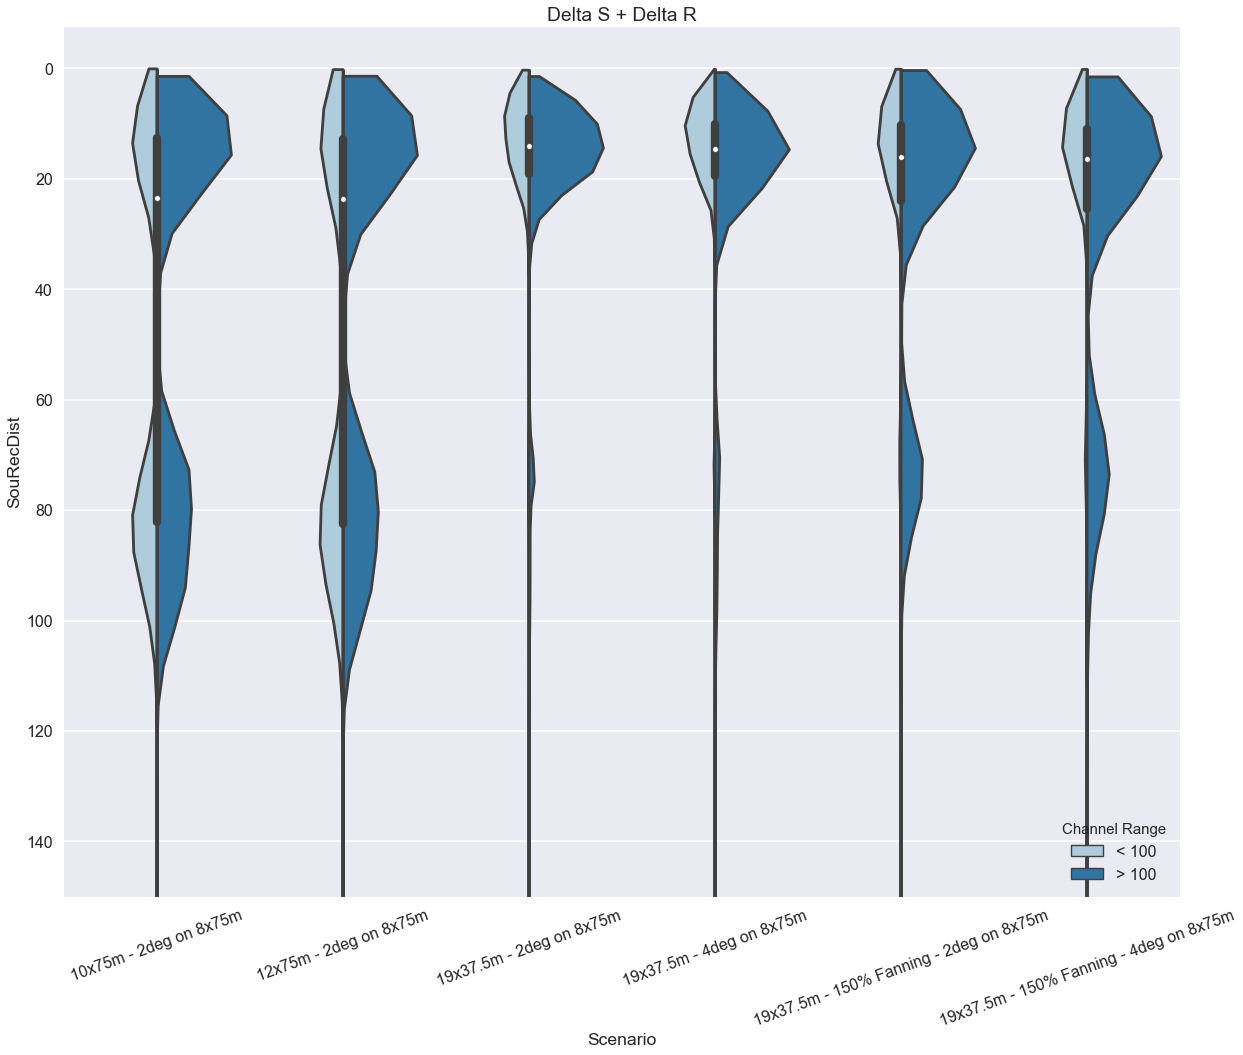

In [12]:
plot_dist(df_combined, 'SouRecDist', 150, 'Delta S + Delta R', plttype='violin')

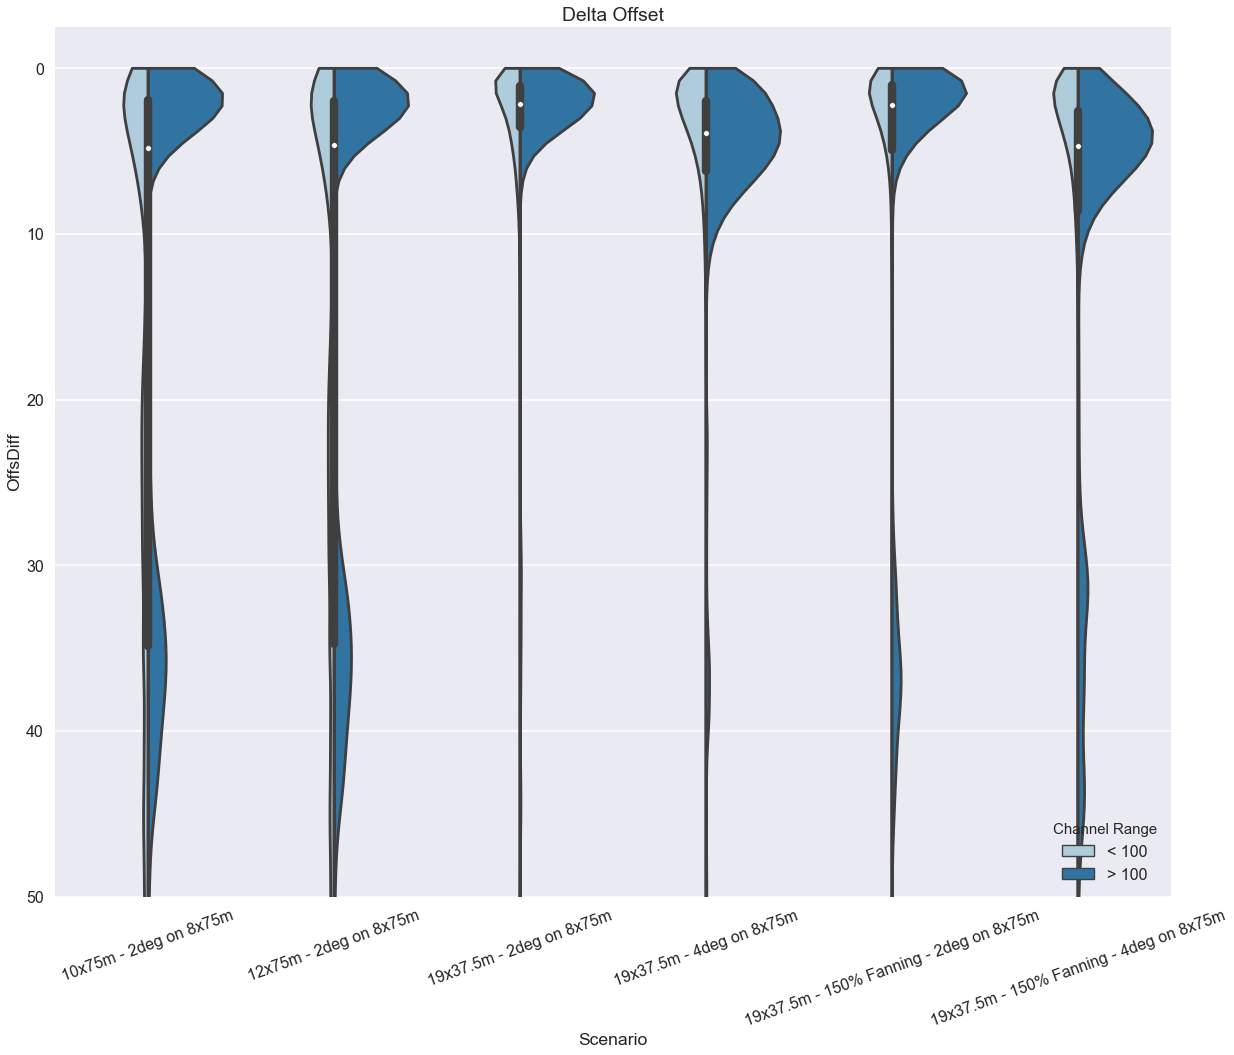

In [13]:
plot_dist(df_combined, 'OffsDiff', 50, 'Delta Offset', plttype='violin')

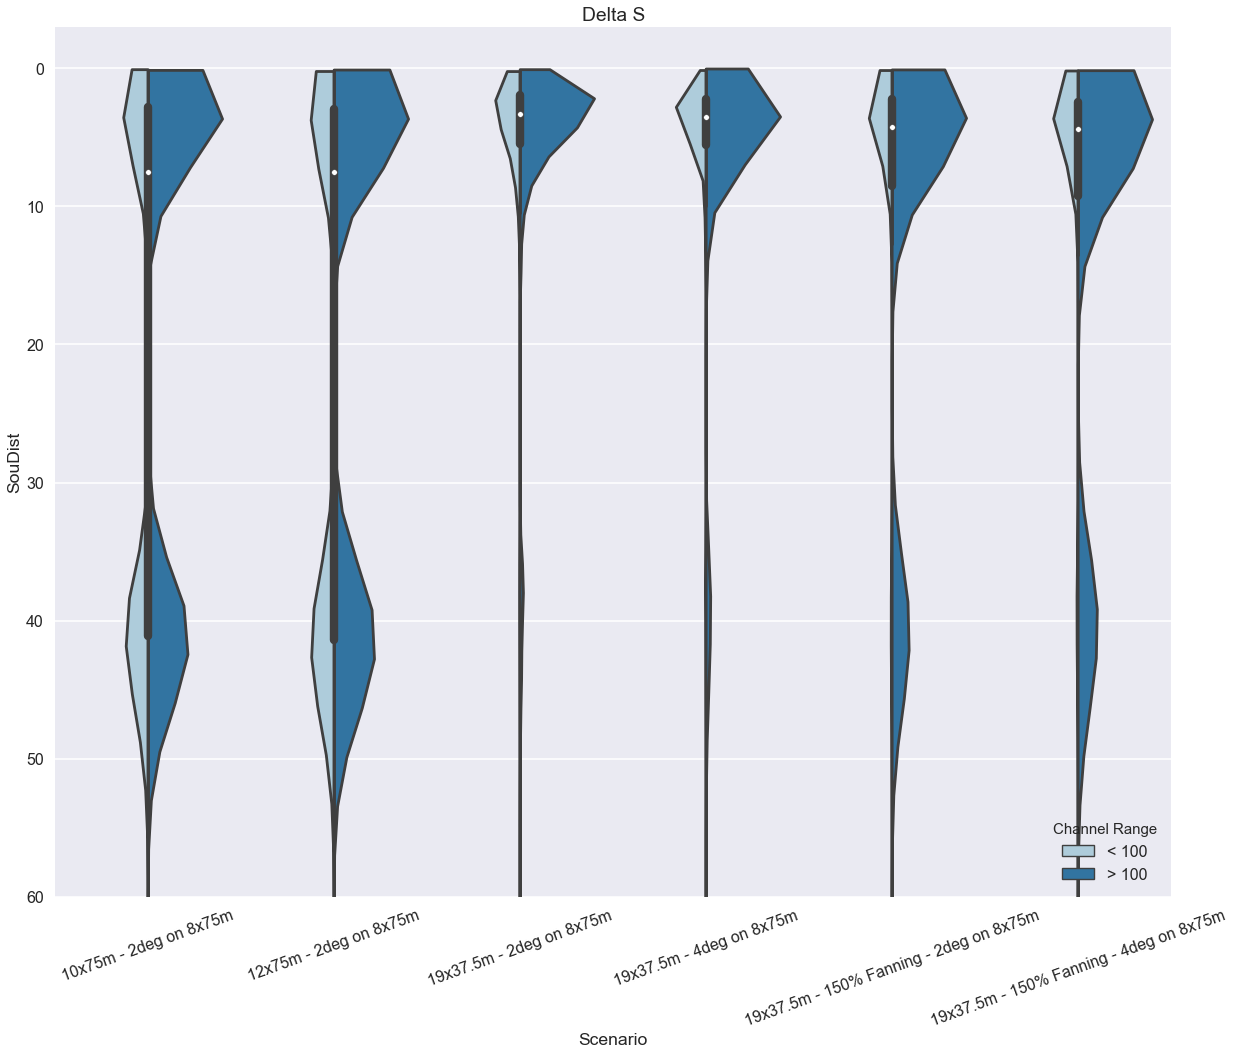

In [14]:
plot_dist(df_combined, 'SouDist', 60, 'Delta S', plttype='violin')

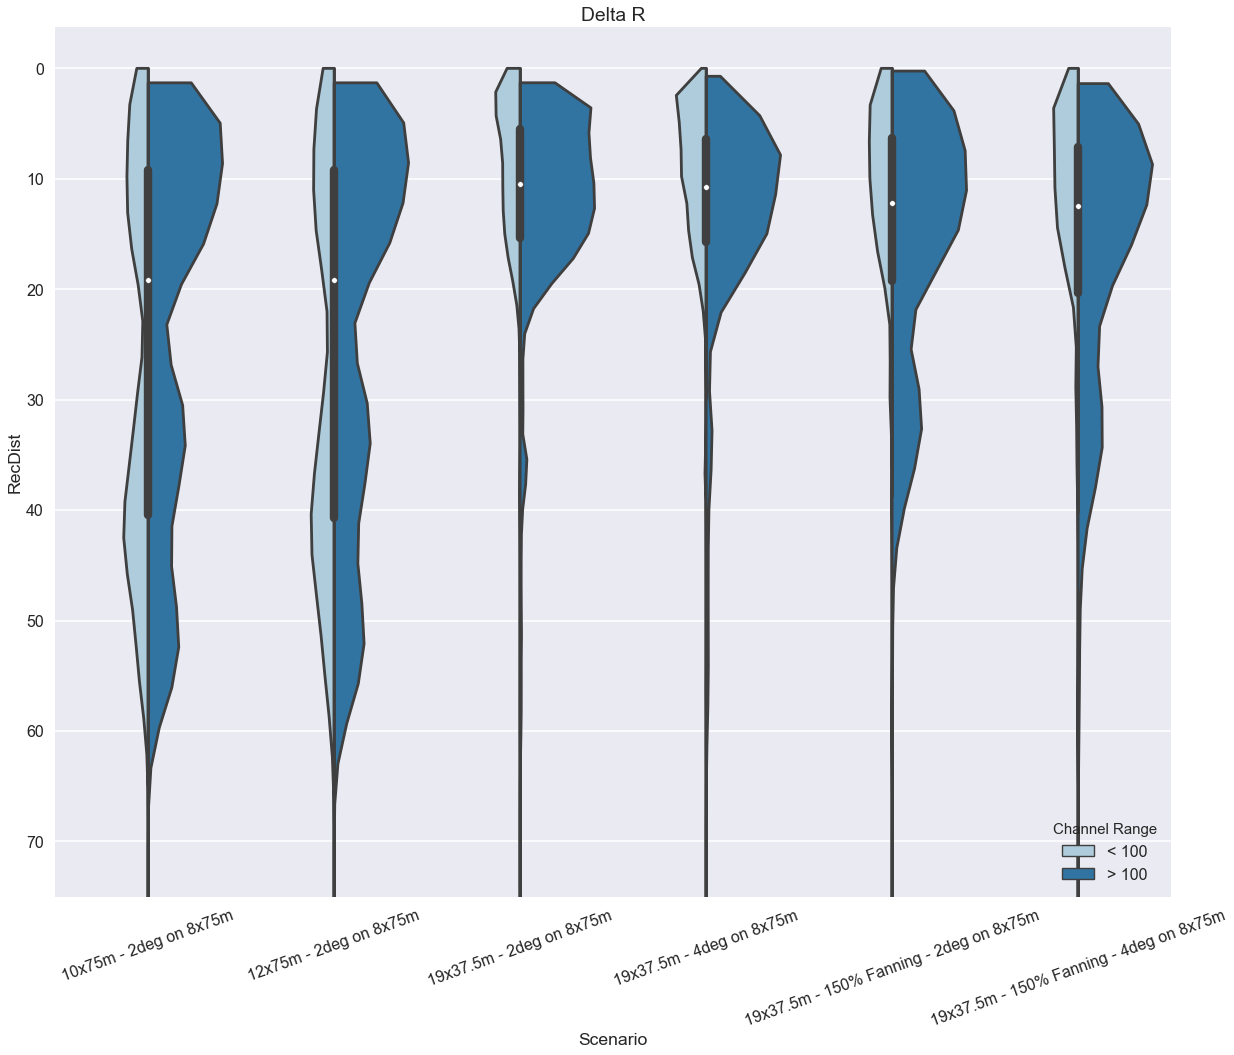

In [15]:
plot_dist(df_combined, 'RecDist', 75, 'Delta R', plttype='violin')

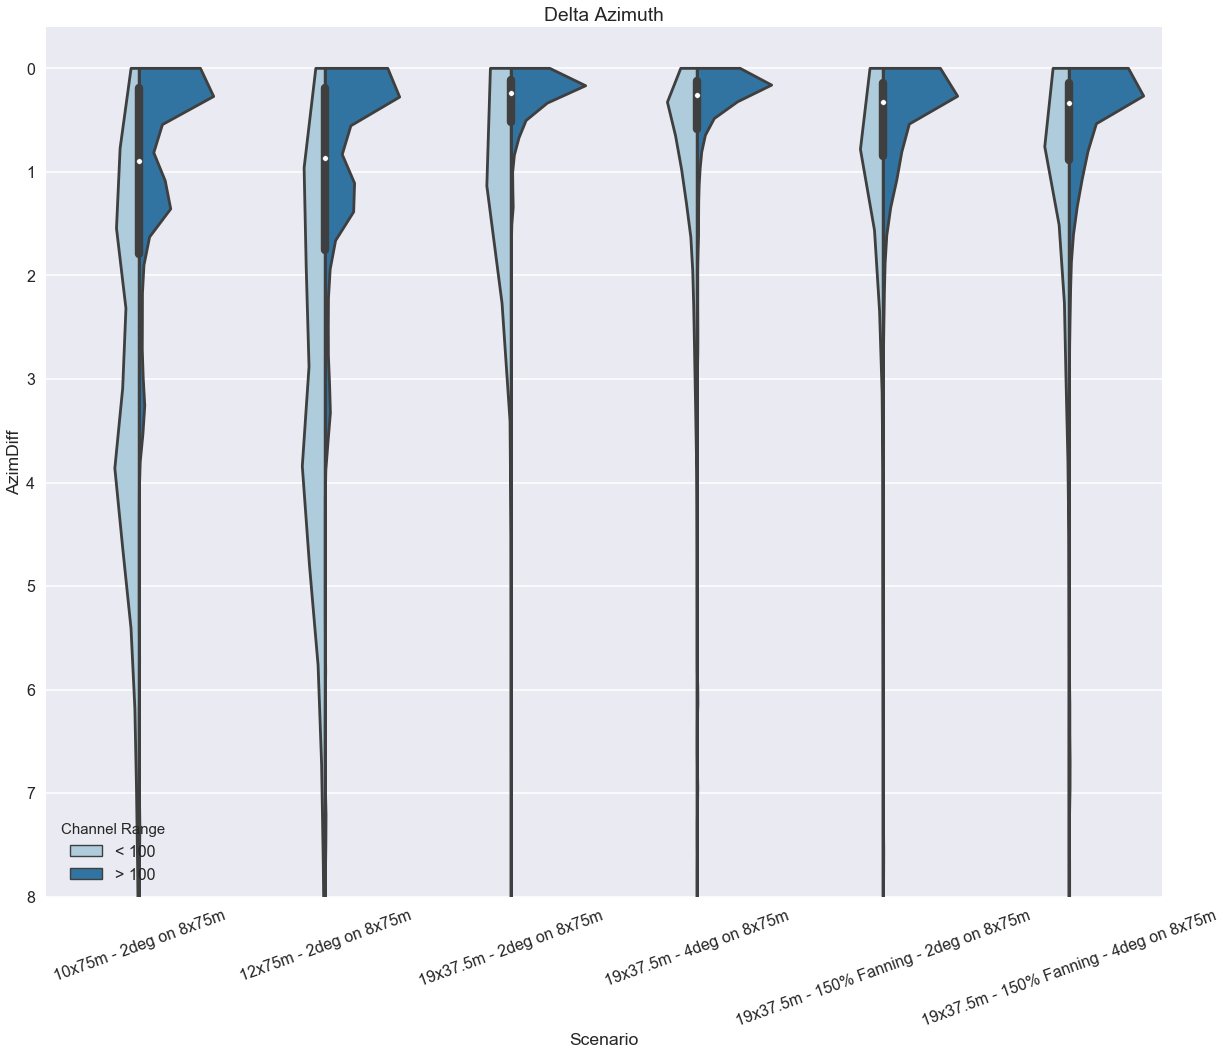

In [16]:
plot_dist(df_combined, 'AzimDiff', 8, 'Delta Azimuth', plttype='violin')

In [17]:
def make_summary(df, attribute):
    #summary = df.describe(percentiles=[0.1, 0.25, 0.5, 0.9])[['OffsDiff', 'AzimDiff', 'CMPDist', 'CMPInDist', 'CMPCrDist', 'SouDist', 'SouInDist', 'SouCrDist', 'RecDist', 'RecInDist', 'RecCrDist', 'SouRecDist']].round(decimals=1).T
    summary = df.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])[[attribute]].round(decimals=1)
    #summary['Scenario'] = df[['Scenario']].iloc[0,0]
    #summary = summary.set_index([attribute])
    summary = summary.T
    summary['Scenario'] = df[['Scenario']].iloc[0,0]
    summary = summary.set_index(['Scenario']).reset_index()
    return summary

In [18]:
def makefullsummary(attribute):
    summary = make_summary(df_1, attribute)
    summary = summary.append(make_summary(df_2, attribute), ignore_index=True)
    summary = summary.append(make_summary(df_3, attribute), ignore_index=True)    
    summary = summary.append(make_summary(df_4, attribute), ignore_index=True)
    summary = summary.append(make_summary(df_5, attribute), ignore_index=True)
    summary = summary.append(make_summary(df_6, attribute), ignore_index=True)
    return summary

In [19]:
def make_heatmap(df, caption):
    cm = sns.light_palette("red", as_cmap=True)
    s = df.style.set_caption(caption).background_gradient(cmap=cm).hide_index().hide_columns(['count'])
    #s = df.style.set_caption(caption).background_gradient(cmap=cm).hide_index()
    return s
    

In [20]:
summary_offsetdiff = makefullsummary('OffsDiff')
make_heatmap(summary_offsetdiff, 'Delta Offset')

Scenario,mean,std,min,10%,25%,50%,75%,90%,max
10x75m - 2deg on 8x75m,17.6,18.3,0,0.8,1.9,4.8,34.9,42,74.9
12x75m - 2deg on 8x75m,17.5,18.2,0,0.8,2,4.7,34.7,41.9,74.9
19x37.5m - 2deg on 8x75m,4.9,11.3,0,0.4,1.1,2.1,3.5,5.7,74.9
19x37.5m - 4deg on 8x75m,6.8,11.7,0,0.8,2,3.9,6.2,9.5,74.9
19x37.5m - 150% Fanning - 2deg on 8x75m,9.2,15.2,0,0.4,1,2.2,4.9,36.9,75
19x37.5m - 150% Fanning - 4deg on 8x75m,11.6,16.1,0,1.1,2.6,4.7,8.6,37.5,74.9


In [21]:
summary_sourcerecdist = makefullsummary('SouRecDist')
make_heatmap(summary_sourcerecdist, 'Delta S + Delta R')

Scenario,mean,std,min,10%,25%,50%,75%,90%,max
10x75m - 2deg on 8x75m,54.1,77.9,0.1,7.4,12.7,23.5,82.1,94.1,706.6
12x75m - 2deg on 8x75m,58.4,91.8,0.2,7.5,12.8,23.7,82.6,94.8,711.1
19x37.5m - 2deg on 8x75m,20.2,32.4,0.3,5.8,9.1,14.1,19.2,24.8,429
19x37.5m - 4deg on 8x75m,23.1,52.5,0.2,7.1,10,14.5,19.6,25.8,691.6
19x37.5m - 150% Fanning - 2deg on 8x75m,37.1,83.6,0.2,6.3,10.2,16,24,74.9,697.6
19x37.5m - 150% Fanning - 4deg on 8x75m,42.1,95,0.2,7.5,11,16.5,25.5,75.8,714.2


In [22]:
summary_sourcedist = makefullsummary('SouDist')
make_heatmap(summary_sourcedist, 'Delta S')

Scenario,mean,std,min,10%,25%,50%,75%,90%,max
10x75m - 2deg on 8x75m,25.1,39.9,0.1,1.5,2.8,7.5,41.1,45.1,349.3
12x75m - 2deg on 8x75m,27.3,46.7,0.1,1.4,2.9,7.5,41.4,45.5,352.2
19x37.5m - 2deg on 8x75m,7.1,16.8,0.1,1.2,2,3.3,5.4,9.1,208.6
19x37.5m - 4deg on 8x75m,8.5,26.7,0,1.2,2.2,3.6,5.6,9.1,343.9
19x37.5m - 150% Fanning - 2deg on 8x75m,16.9,43.2,0.1,1.4,2.2,4.2,8.5,41.9,347.1
19x37.5m - 150% Fanning - 4deg on 8x75m,19.2,48.7,0.2,1.3,2.5,4.4,9.2,42.1,351.4


In [23]:
summary_recdist = makefullsummary('RecDist')
make_heatmap(summary_recdist, 'Delta R')

Scenario,mean,std,min,10%,25%,50%,75%,90%,max
10x75m - 2deg on 8x75m,29,38.6,0,3.9,9.2,19.2,40.4,52,362.6
12x75m - 2deg on 8x75m,31.1,45.5,0,4.1,9.2,19.2,40.7,52.5,363.3
19x37.5m - 2deg on 8x75m,13,16.3,0,2.7,5.5,10.5,15.4,19.7,226.3
19x37.5m - 4deg on 8x75m,14.6,26.1,0,3.9,6.4,10.7,15.8,20.8,353.6
19x37.5m - 150% Fanning - 2deg on 8x75m,20.2,40.8,0,2.9,6.3,12.2,19.3,33.2,356.6
19x37.5m - 150% Fanning - 4deg on 8x75m,22.9,46.6,0,4.3,7.1,12.5,20.3,34.8,363.8


In [24]:
summary_azmdiff = makefullsummary('AzimDiff')
make_heatmap(summary_azmdiff, 'Delta Azimuth')

Scenario,mean,std,min,10%,25%,50%,75%,90%,max
10x75m - 2deg on 8x75m,1.6,3,0,0.1,0.2,0.9,1.8,3.8,76.5
12x75m - 2deg on 8x75m,1.7,4,0,0.1,0.2,0.9,1.8,3.9,95.1
19x37.5m - 2deg on 8x75m,0.7,3.6,0,0,0.1,0.2,0.5,1.3,112.3
19x37.5m - 4deg on 8x75m,0.6,1,0,0,0.1,0.3,0.6,1.4,32.3
19x37.5m - 150% Fanning - 2deg on 8x75m,0.8,1.9,0,0.1,0.1,0.3,0.8,1.5,77.5
19x37.5m - 150% Fanning - 4deg on 8x75m,0.9,2.2,0,0.1,0.1,0.3,0.9,1.7,74.9


In [25]:
cm = sns.light_palette("green", as_cmap=True)
s = summary_sourcerecdist[['Scenario','count']].style.set_caption('Number of Traces').background_gradient(cmap=cm).hide_index()

In [26]:
s

Scenario,count
10x75m - 2deg on 8x75m,619989
12x75m - 2deg on 8x75m,655826
19x37.5m - 2deg on 8x75m,653297
19x37.5m - 4deg on 8x75m,555749
19x37.5m - 150% Fanning - 2deg on 8x75m,670505
19x37.5m - 150% Fanning - 4deg on 8x75m,637550


In [27]:
df_combined.describe()

,BasShotNo,MonShotNo,BasRecvNo,MonRecvNo,OffsDiff,AzimDiff,CMPDist,CMPInDist,CMPCrDist,SouDist,SouInDist,SouCrDist,RecDist,RecInDist,RecCrDist,SouRecDist
count,3.792916e+06,3.792916e+06,3.792916e+06,3.792916e+06,3.792916e+06,3.792916e+06,3.792916e+06,3.792916e+06,3.792916e+06,3.792916e+06,3.792916e+06,3.792916e+06,3.792916e+06,3.792916e+06,3.792916e+06,3.792916e+06
mean,1.042157e+03,1.559968e+03,1.636408e+03,3.343061e+03,1.131660e+01,1.047068e+00,5.223464e+00,4.938054e+00,1.144253e+00,1.751270e+01,1.569919e+01,5.772856e+00,2.194103e+01,2.004365e+01,6.384205e+00,3.945373e+01
std,3.260014e+02,7.563698e+02,9.189601e+02,1.896715e+03,1.617793e+01,2.865163e+00,2.866152e+00,3.016600e+00,8.401350e-01,3.969186e+01,3.907883e+01,8.671382e+00,3.810170e+01,3.771674e+01,8.251643e+00,7.737530e+01
min,4.760000e+02,4.760000e+02,1.000000e+00,3.000000e+00,1.938250e-06,0.000000e+00,1.381070e-03,0.000000e+00,0.000000e+00,4.668130e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.498800e-02
25%,9.350000e+02,9.470000e+02,8.530000e+02,1.861000e+03,1.550860e+00,1.437050e-01,2.878130e+00,2.442870e+00,4.687500e-01,2.339930e+00,1.742190e+00,6.025390e-01,6.979820e+00,6.138670e+00,1.126950e+00,1.067250e+01
50%,1.027000e+03,1.130000e+03,1.679000e+03,3.114000e+03,3.343110e+00,3.445885e-01,5.029090e+00,4.815430e+00,9.843750e-01,4.355910e+00,3.951170e+00,1.367190e+00,1.294390e+01,1.226660e+01,2.490230e+00,1.669820e+01
75%,1.376000e+03,2.303000e+03,2.415000e+03,4.638000e+03,9.860793e+00,1.103460e+00,7.319050e+00,7.171880e+00,1.654300e+00,1.365810e+01,9.623050e+00,3.886720e+00,2.498190e+01,2.016700e+01,6.851560e+00,3.972512e+01
max,3.705000e+03,2.426000e+03,3.264000e+03,7.752000e+03,7.498410e+01,1.123380e+02,3.127280e+01,3.121090e+01,1.023880e+01,3.522180e+02,3.500230e+02,1.498230e+02,3.638430e+02,3.636290e+02,1.500220e+02,7.142330e+02


In [28]:
df_3.describe().T

,count,mean,std,min,25%,50%,75%,max
BasShotNo,653297.0,1063.990403,403.223118,476.000000,933.000000,1027.000000,1382.000000,3705.00000
MonShotNo,653297.0,1561.617049,758.770832,476.000000,941.000000,1142.000000,2303.000000,2426.00000
BasRecvNo,653297.0,1631.265014,912.210032,1.000000,852.000000,1670.000000,2406.000000,3264.00000
MonRecvNo,653297.0,3881.805471,1976.245018,31.000000,2323.000000,3902.000000,5396.000000,7752.00000
OffsDiff,653297.0,4.890174,11.293230,0.000002,1.051420,2.134280,3.510550,74.94920
AzimDiff,653297.0,0.666452,3.554145,0.000000,0.116083,0.238980,0.516069,112.33800
CMPDist,653297.0,5.107546,2.832903,0.012780,2.680820,4.956710,7.280010,18.43470
CMPInDist,653297.0,4.920076,2.946523,0.000000,2.431640,4.826660,7.191890,18.35790
CMPCrDist,653297.0,0.912655,0.624724,0.000000,0.398438,0.827148,1.328610,8.20654
SouDist,653297.0,7.143394,16.752962,0.096022,1.953290,3.272820,5.442380,208.58700


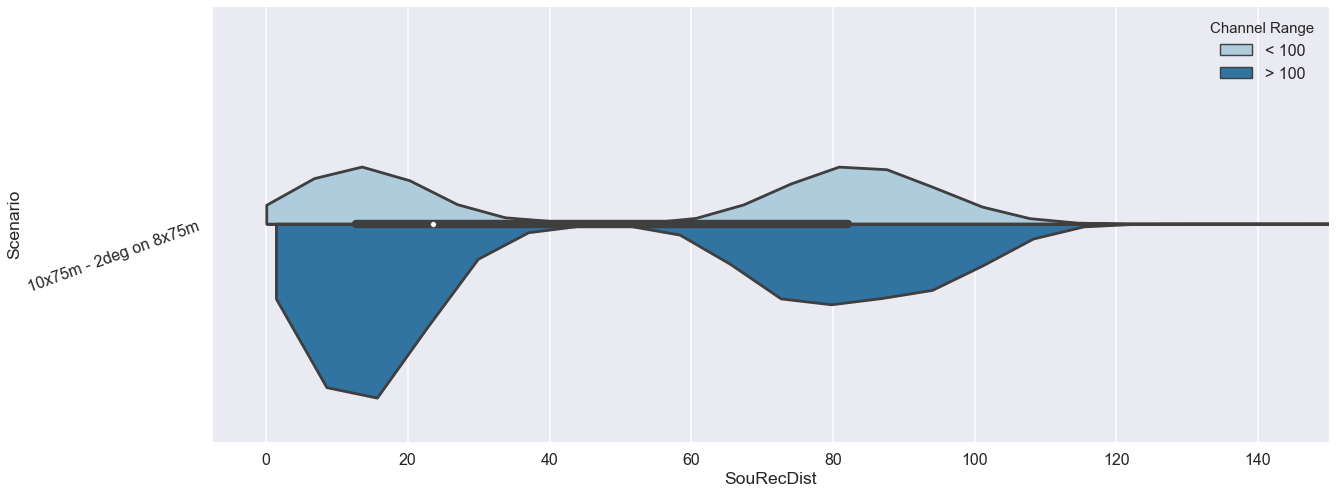

In [34]:
plt.figure(figsize=(20,8))
plt.yticks(rotation=20)
plt.gca().invert_yaxis()
plt.xlim(-7.5,150)
sns.violinplot(data=df_1, y='Scenario', x='SouRecDist', hue='Channel Range', split=True, cut=0, scale='count')